In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive/')
DATA_DIR = '/content/drive/MyDrive/airpollution_project/data_raw'

os.listdir()



Mounted at /content/drive/


['.config', 'drive', 'sample_data']

In [ ]:

DATA_DIR = '/content/drive/MyDrive/airpollution_project/data_raw'

df = pd.read_parquet(os.path.join(DATA_DIR, 'ml_ready_dataset.parquet'))

In [ ]:
for col in ['formula_0','formula_1','formula_2','formula_3','formula_4','formula_5']:
    print(col, df[col].unique())


formula_0 ['NO' None 'PM10' 'NO2']
formula_1 ['NO' None 'PM10' 'NO2']
formula_2 [None 'NO']
formula_3 [None 'NO']
formula_4 [None 'CO' 'NO2' 'PM10']
formula_5 [None 'CO' 'NO2' 'PM10']


In [ ]:
os.listdir('/content/drive/MyDrive/airpollution_project')
os.listdir('/content/drive/MyDrive/airpollution_project/data_raw')


['rivm_NL10445_PM25_2024-01-01_2024-12-31.parquet',
 'rivm_NL49002_PM25_2024-01-01_2024-12-31.parquet',
 'rivm_stations.csv',
 'rivm_NL10445_NO2_2024-01-01_2024-12-31.parquet',
 'rivm_NL49002_NO2_2024-01-01_2024-12-31.parquet',
 'rivm_NL49007_PM25_2024-01-01_2024-12-31.parquet',
 'rivm_NL49007_NO2_2024-01-01_2024-12-31.parquet',
 'ml_ready_dataset.parquet']

#**ridge regression**

In [ ]:
import os, pandas as pd, numpy as np
DATA_DIR = '/content/drive/MyDrive/airpollution_project/data_raw'
fn = os.path.join(DATA_DIR, 'ml_ready_dataset.parquet')
print('Loading', fn)
df_raw = pd.read_parquet(fn)
print('raw shape', df_raw.shape)
display(df_raw.head())

pairs = []
for i in range(6):
    fcol = f'formula_{i}'
    vcol = f'value_{i}'
    if fcol in df_raw.columns and vcol in df_raw.columns:
        tmp = df_raw[[ 'station_id', 'timestamp_measured', 'hour', 'dayofweek', 'month', fcol, vcol]].copy()
        tmp = tmp.rename(columns={fcol: 'variable', vcol: 'value'})
        tmp['pair_idx'] = i
        pairs.append(tmp)

long = pd.concat(pairs, axis=0, ignore_index=True)
long = long[long['variable'].notna()].copy()
print('long shape', long.shape)
display(long[['station_id','timestamp_measured','variable','value']].head(20))

wide = long.pivot_table(index=['station_id','timestamp_measured'], columns='variable', values='value', aggfunc='mean').reset_index()
time_cols = df_raw[['station_id','timestamp_measured','hour','dayofweek','month']].drop_duplicates()
wide = wide.merge(time_cols, on=['station_id','timestamp_measured'], how='left')

print('wide columns:', wide.columns.tolist())
display(wide.head())


Loading /content/drive/MyDrive/airpollution_project/data_raw/ml_ready_dataset.parquet
raw shape (503, 17)


,station_id,value_0,timestamp_measured,formula_0,value_1,formula_1,value_2,formula_2,value_3,formula_3,value_4,formula_4,value_5,formula_5,hour,dayofweek,month
0,NL10445,19.01,2024-12-25 00:00:00+00:00,NO,19.01,NO,NaN,None,NaN,None,NaN,None,NaN,None,0,2,12
1,NL49002,NaN,2024-12-25 00:00:00+00:00,None,NaN,None,24.9,NO,24.9,NO,NaN,None,NaN,None,0,2,12
2,NL10445,10.97,2024-12-25 01:00:00+00:00,NO,10.97,NO,NaN,None,NaN,None,NaN,None,NaN,None,1,2,12
3,NL49002,NaN,2024-12-25 01:00:00+00:00,None,NaN,None,39.2,NO,39.2,NO,NaN,None,NaN,None,1,2,12
4,NL49007,NaN,2024-12-25 01:00:00+00:00,None,NaN,None,NaN,None,NaN,None,413.5,CO,413.5,CO,1,2,12


long shape (1006, 8)


,station_id,timestamp_measured,variable,value
0,NL10445,2024-12-25 00:00:00+00:00,NO,19.01
2,NL10445,2024-12-25 01:00:00+00:00,NO,10.97
5,NL10445,2024-12-25 02:00:00+00:00,NO,15.21
8,NL10445,2024-12-25 03:00:00+00:00,NO,19.71
11,NL10445,2024-12-25 04:00:00+00:00,NO,9.64
14,NL10445,2024-12-25 05:00:00+00:00,NO,6.40
17,NL10445,2024-12-25 06:00:00+00:00,NO,11.22
20,NL10445,2024-12-25 07:00:00+00:00,PM10,8.27
23,NL10445,2024-12-25 08:00:00+00:00,NO,2.76
26,NL10445,2024-12-25 09:00:00+00:00,NO,4.57


wide columns: ['station_id', 'timestamp_measured', 'CO', 'NO', 'NO2', 'PM10', 'hour', 'dayofweek', 'month']


,station_id,timestamp_measured,CO,NO,NO2,PM10,hour,dayofweek,month
0,NL10445,2024-12-25 00:00:00+00:00,NaN,19.01,NaN,NaN,0,2,12
1,NL10445,2024-12-25 01:00:00+00:00,NaN,10.97,NaN,NaN,1,2,12
2,NL10445,2024-12-25 02:00:00+00:00,NaN,15.21,NaN,NaN,2,2,12
3,NL10445,2024-12-25 03:00:00+00:00,NaN,19.71,NaN,NaN,3,2,12
4,NL10445,2024-12-25 04:00:00+00:00,NaN,9.64,NaN,NaN,4,2,12


In [ ]:
if 'PM25' in wide.columns or 'PM2.5' in wide.columns:
    print('PM2.5 present in ml_ready_dataset.')
    # standardize name:
    if 'PM2.5' in wide.columns and 'PM25' not in wide.columns:
        wide['PM25'] = wide['PM2.5']

else:
    print('PM2.5 missing - loading rivm PM25 files and merging in.')
    pm_files = [f for f in os.listdir(DATA_DIR) if 'PM25' in f and f.endswith('.parquet')]
    print('pm_files found:', pm_files)

    pm_list = []
    for p in pm_files:
        dfpm = pd.read_parquet(os.path.join(DATA_DIR, p))
        print(p, dfpm.shape, dfpm.columns.tolist())

        dfpm = dfpm.rename(columns={
            'station_number': 'station_id',
            'value': 'PM25'
        })
        dfpm['timestamp_measured'] = pd.to_datetime(dfpm['timestamp_measured'])
        pm_list.append(dfpm[['station_id','timestamp_measured','PM25']])

=    pm_all = pd.concat(pm_list, ignore_index=True)

    wide['timestamp_measured'] = pd.to_datetime(wide['timestamp_measured'])
    wide = wide.merge(pm_all, on=['station_id','timestamp_measured'], how='left')

    print('After merge, PM25 null count:', wide['PM25'].isna().sum())


PM2.5 missing - loading rivm PM25 files and merging in.
pm_files found: ['rivm_NL10445_PM25_2024-01-01_2024-12-31.parquet', 'rivm_NL49002_PM25_2024-01-01_2024-12-31.parquet', 'rivm_NL49007_PM25_2024-01-01_2024-12-31.parquet']
rivm_NL10445_PM25_2024-01-01_2024-12-31.parquet (504, 4) ['station_number', 'value', 'timestamp_measured', 'formula']
rivm_NL49002_PM25_2024-01-01_2024-12-31.parquet (336, 4) ['station_number', 'value', 'timestamp_measured', 'formula']
rivm_NL49007_PM25_2024-01-01_2024-12-31.parquet (1000, 4) ['station_number', 'value', 'timestamp_measured', 'formula']
After merge, PM25 null count: 0


In [ ]:

wide['station_id'] = wide['station_id'].astype(str)
wide['timestamp_measured'] = pd.to_datetime(wide['timestamp_measured'])

print('rows before dropna PM25:', len(wide))
wide = wide[wide['PM25'].notna()].copy()
print('rows after dropna PM25:', len(wide))

wide = wide.sort_values(['station_id','timestamp_measured']).reset_index(drop=True)
display(wide.head())


rows before dropna PM25: 1840
rows after dropna PM25: 1840


,station_id,timestamp_measured,CO,NO,NO2,PM10,hour,dayofweek,month,PM25
0,NL10445,2024-12-25 00:00:00+00:00,NaN,19.01,NaN,NaN,0,2,12,19.01
1,NL10445,2024-12-25 00:00:00+00:00,NaN,19.01,NaN,NaN,0,2,12,48.99
2,NL10445,2024-12-25 00:00:00+00:00,NaN,19.01,NaN,NaN,0,2,12,15.95
3,NL10445,2024-12-25 01:00:00+00:00,NaN,10.97,NaN,NaN,1,2,12,10.97
4,NL10445,2024-12-25 01:00:00+00:00,NaN,10.97,NaN,NaN,1,2,12,49.56


In [ ]:
exclude = ['station_id','timestamp_measured','PM25','hour','dayofweek','month']
candidate_preds = [c for c in wide.columns if c not in exclude]
print('candidate predictors:', candidate_preds)

for c in candidate_preds:
    wide[c] = pd.to_numeric(wide[c], errors='coerce')

TIME_FEATS = ['hour','dayofweek','month']
LAG = 6

def make_lagged_per_station(df_station, lag=LAG, preds=candidate_preds, time_feats=TIME_FEATS):
    rows = []
    n = len(df_station)
    for i in range(lag, n):
        row = {}
        row['station_id'] = df_station.iloc[i]['station_id']
        row['timestamp_measured'] = df_station.iloc[i]['timestamp_measured']
        for j in range(lag):
            for p in preds:
                row[f'{p}_lag{lag-1-j}'] = df_station.iloc[i-lag+j][p]
        for t in time_feats:
            row[t] = df_station.iloc[i][t]
        row['PM25'] = df_station.iloc[i]['PM25']
        rows.append(row)
    return pd.DataFrame(rows)

lagged_list=[]
for st in wide['station_id'].unique():
    st_df = wide[wide['station_id']==st].reset_index(drop=True)
    lagged_st = make_lagged_per_station(st_df)
    if not lagged_st.empty:
        lagged_list.append(lagged_st)
lagged = pd.concat(lagged_list, ignore_index=True)
print('lagged shape', lagged.shape)
display(lagged.head())


candidate predictors: ['CO', 'NO', 'NO2', 'PM10']
lagged shape (1822, 30)


,station_id,timestamp_measured,CO_lag5,NO_lag5,NO2_lag5,PM10_lag5,CO_lag4,NO_lag4,NO2_lag4,PM10_lag4,...,NO2_lag1,PM10_lag1,CO_lag0,NO_lag0,NO2_lag0,PM10_lag0,hour,dayofweek,month,PM25
0,NL10445,2024-12-25 02:00:00+00:00,NaN,19.01,NaN,NaN,NaN,19.01,NaN,NaN,...,NaN,NaN,NaN,10.97,NaN,NaN,2,2,12,15.21
1,NL10445,2024-12-25 02:00:00+00:00,NaN,19.01,NaN,NaN,NaN,19.01,NaN,NaN,...,NaN,NaN,NaN,15.21,NaN,NaN,2,2,12,50.29
2,NL10445,2024-12-25 02:00:00+00:00,NaN,19.01,NaN,NaN,NaN,10.97,NaN,NaN,...,NaN,NaN,NaN,15.21,NaN,NaN,2,2,12,3.15
3,NL10445,2024-12-25 03:00:00+00:00,NaN,10.97,NaN,NaN,NaN,10.97,NaN,NaN,...,NaN,NaN,NaN,15.21,NaN,NaN,3,2,12,19.71
4,NL10445,2024-12-25 03:00:00+00:00,NaN,10.97,NaN,NaN,NaN,10.97,NaN,NaN,...,NaN,NaN,NaN,19.71,NaN,NaN,3,2,12,49.83


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_preds(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

param_grid = {'ridge__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
tscv = TimeSeriesSplit(n_splits=5)  # tune use; adjust if small train set

results = {}
for st in lagged['station_id'].unique():
    df_st = lagged[lagged['station_id']==st].sort_values('timestamp_measured').reset_index(drop=True)
    n = len(df_st)
    cut = int(0.8 * n)
    train_df = df_st.iloc[:cut]
    test_df  = df_st.iloc[cut:]
    X_train = train_df.drop(['station_id','timestamp_measured','PM25'], axis=1)
    y_train = train_df['PM25']
    X_test  = test_df.drop(['station_id','timestamp_measured','PM25'], axis=1)
    y_test  = test_df['PM25']

    pipe = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
    gcv = GridSearchCV(pipe, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    print(f'Running GridSearch for station {st} with train size {len(X_train)} and test size {len(X_test)}...')
    gcv.fit(X_train.fillna(0), y_train)
    best = gcv.best_estimator_
    y_pred_test = best.predict(X_test.fillna(0))
    metrics_test = evaluate_preds(y_test, y_pred_test)
    print(st, 'best alpha:', gcv.best_params_['ridge__alpha'], ' test metrics:', metrics_test)
    results[st] = {
        'best_alpha': gcv.best_params_['ridge__alpha'],
        'metrics_test': metrics_test,
        'y_test': y_test.reset_index(drop=True),
        'y_pred_test': pd.Series(y_pred_test)
    }

rows = []
for st, info in results.items():
    r = {'station':st, 'alpha':info['best_alpha']}
    r.update(info['metrics_test'])
    rows.append(r)
summary = pd.DataFrame(rows)
display(summary)
summary.to_csv('/content/ridge_summary_by_station.csv', index=False)
print('Saved /content/ridge_summary_by_station.csv')


Running GridSearch for station NL10445 with train size 398 and test size 100...
NL10445 best alpha: 100.0  test metrics: {'RMSE': np.float64(21.018586774896203), 'MAE': 12.055308672833851, 'R2': -0.056982167252324745}
Running GridSearch for station NL49002 with train size 264 and test size 66...
NL49002 best alpha: 10.0  test metrics: {'RMSE': np.float64(5.33247982560048), 'MAE': 4.392417924097343, 'R2': 0.27852561467513526}
Running GridSearch for station NL49007 with train size 795 and test size 199...
NL49007 best alpha: 100.0  test metrics: {'RMSE': np.float64(116.05536936842704), 'MAE': 82.34031394490827, 'R2': 0.02398998197174096}


,station,alpha,RMSE,MAE,R2
0,NL10445,100.0,21.018587,12.055309,-0.056982
1,NL49002,10.0,5.332480,4.392418,0.278526
2,NL49007,100.0,116.055369,82.340314,0.023990


Saved /content/ridge_summary_by_station.csv


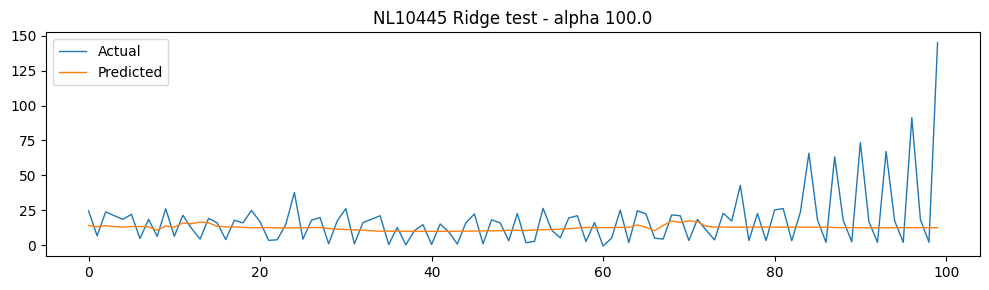

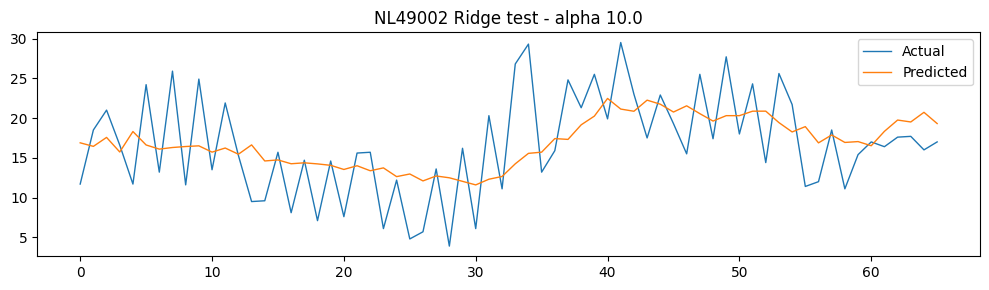

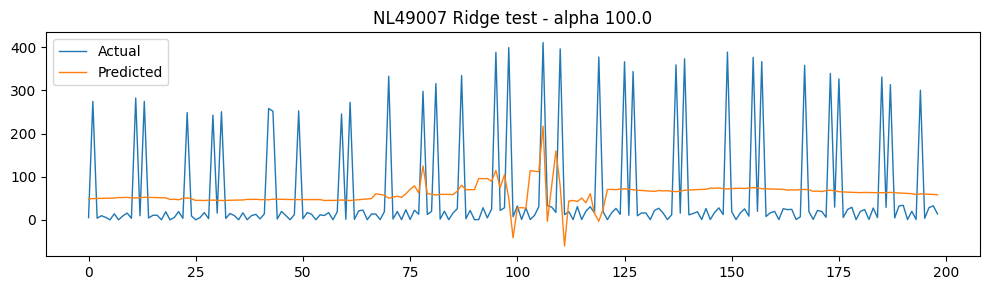

In [ ]:
import matplotlib.pyplot as plt
for st, info in results.items():
    plt.figure(figsize=(10,3))
    plt.plot(info['y_test'].values, label='Actual', linewidth=1)
    plt.plot(info['y_pred_test'].values, label='Predicted', linewidth=1)
    plt.title(f'{st} Ridge test - alpha {info["best_alpha"]}')
    plt.legend()
    plt.tight_layout()
    plt.show()


#**end of ridge regression**

In [ ]:
!mkdir -p project/data
!mkdir -p project/src
!mkdir -p project/plots
!mkdir -p project/models


In [ ]:
import shutil
import os

for f in os.listdir():
    if f.endswith(".parquet"):
        shutil.move(f, "project/data/")


In [ ]:
%%writefile project/src/data_loader.py
import os
import pandas as pd

def load_all_parquet(data_dir="project/data"):
    """
    Loads all parquet files and returns a dictionary:
    {
       (station, pollutant): dataframe
    }
    """
    data = {}

    for fname in os.listdir(data_dir):
        if not fname.endswith(".parquet"):
            continue

        fullpath = os.path.join(data_dir, fname)

        parts = fname.split("_")
        station = parts[1]
        pollutant = parts[2]

        df = pd.read_parquet(fullpath)

        df["Start"] = pd.to_datetime(df["Start"])
        df["End"] = pd.to_datetime(df["End"])

        df = df.set_index("Start").sort_index()

        data[(station, pollutant)] = df

    return data


def merge_by_time(data_dict):
    """
    Given the dictionary returned by load_all_parquet, merge all pollutant data
    for each station into a single time-indexed DataFrame.

    Returns:
    {
       station: merged_dataframe
    }
    """

    stations = {}

    unique_stations = set([k[0] for k in data_dict.keys()])

    for station in unique_stations:
        dfs = []
        for (st, pollutant), df in data_dict.items():
            if st != station:
                continue
            colname = pollutant
            dfs.append(df[["Value"]].rename(columns={"Value": colname}))

        merged = pd.concat(dfs, axis=1, join="outer").sort_index()

        stations[station] = merged

    return stations


Writing project/src/data_loader.py


In [ ]:
import sys
import importlib

import sys
sys.path.append("/content/project/src")

import data_loader
importlib.reload(data_loader)

from data_loader import load_all_parquet, merge_by_time


In [ ]:
data = load_all_parquet()
merged = merge_by_time(data)

print("Data loaded successfully!")
print("Stations:", list(merged.keys()))
for station, df in merged.items():
    print(station, df.shape)
    print(df.head())
    break  # show only the first station for brevity


Data loaded successfully!
Stations: ['DENI048', 'DENI054']
DENI048 (47, 5)
                                      PM2                    CO  \
Start                                                             
2025-11-12 11:00:00  4.746420000000000000  0.203000000000000000   
2025-11-12 12:00:00  5.224650000000000000  0.178422000000000000   
2025-11-12 13:00:00  5.559310000000000000  0.278749000000000000   
2025-11-12 14:00:00  4.794740000000000000  0.314207000000000000   
2025-11-12 15:00:00  5.181340000000000000  0.313317000000000000   

                                        NO                    NO2  \
Start                                                               
2025-11-12 11:00:00  11.664900000000000000  21.314301000000000000   
2025-11-12 12:00:00  15.803101000000000000  25.520000000000000000   
2025-11-12 13:00:00  32.462502000000000000  39.097500000000000000   
2025-11-12 14:00:00  21.647200000000000000  33.696301000000000000   
2025-11-12 15:00:00  19.42490000000000000

In [ ]:
# Fill missing values with forward fill, then backward fill as backup
for station, df in merged.items():
    merged[station] = df.ffill().bfill()

# Verify
for station, df in merged.items():
    print(station, "missing values:", df.isna().sum().sum())


DENI048 missing values: 0
DENI054 missing values: 0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scalers = {}

for station, df in merged.items():
    scaler = MinMaxScaler()
    merged[station] = pd.DataFrame(
        scaler.fit_transform(df),
        columns=df.columns,
        index=df.index
    )
    scalers[station] = scaler


In [ ]:
def create_supervised(df, target_col, n_input=6, n_output=1):
    """
    df: DataFrame with all pollutant features
    target_col: column to predict (e.g., 'PM2')
    n_input: past hours to use
    n_output: future hours to predict
    Returns X, y as numpy arrays
    """
    import numpy as np
    X, y = [], []
    data = df.values
    for i in range(n_input, len(df)-n_output+1):
        X.append(data[i-n_input:i, :])
        y.append(data[i:i+n_output, df.columns.get_loc(target_col)])
    return np.array(X), np.array(y)


In [ ]:
print("Available stations:", list(merged.keys()))


Available stations: ['DENI048', 'DENI054']


In [ ]:
df = merged['DENI048']
print(df.columns)


Index(['PM2', 'CO', 'NO', 'NO2', 'PM1'], dtype='object')


In [ ]:
import numpy as np

def create_supervised(df, target_col='PM2', n_input=6, n_output=1):
    X, y = [], []
    data = df.values
    target_idx = df.columns.get_loc(target_col)
    for i in range(n_input, len(df)-n_output+1):
        X.append(data[i-n_input:i, :])
        y.append(data[i:i+n_output, target_idx])
    return np.array(X), np.array(y)

X, y = create_supervised(df, target_col='PM2', n_input=6, n_output=1)
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (41, 6, 5)
y shape: (41, 1)


In [ ]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (32, 6, 5) (32, 1)
Test shape: (9, 6, 5) (9, 1)


In [ ]:
y_pred_naive = X_test[:, -1, df.columns.get_loc('PM2')]

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
mae_naive = mean_absolute_error(y_test, y_pred_naive)
r2_naive = r2_score(y_test, y_pred_naive)

print("Seasonal Naive RMSE:", rmse_naive)
print("MAE:", mae_naive)
print("R2:", r2_naive)


Seasonal Naive RMSE: 0.33308793670269904
MAE: 0.11128559852167112
R2: 0.3575078873621561


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Flatten X for RF
n_samples, n_timesteps, n_features = X_train.shape
X_train_rf = X_train.reshape(n_samples, n_timesteps*n_features)
X_test_rf = X_test.reshape(X_test.shape[0], n_timesteps*n_features)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train.ravel())
y_pred_rf = rf.predict(X_test_rf)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2:", r2_rf)


Random Forest RMSE: 0.470608952982939
MAE: 0.22259051048974893
R2: -0.28253835559227136


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.1, verbose=1)

y_pred_lstm = model.predict(X_test)
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print("LSTM RMSE:", rmse_lstm)
print("MAE:", mae_lstm)
print("R2:", r2_lstm)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.8487 - mae: 0.9202 - val_loss: 0.6452 - val_mae: 0.8030
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5580 - mae: 0.7458 - val_loss: 0.4073 - val_mae: 0.6377
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3281 - mae: 0.5710 - val_loss: 0.2054 - val_mae: 0.4518
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1397 - mae: 0.3699 - val_loss: 0.0533 - val_mae: 0.2267
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0207 - mae: 0.1326 - val_loss: 0.0033 - val_mae: 0.0522
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0111 - mae: 0.0996 - val_loss: 0.0138 - val_mae: 0.1038
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0149 - mae: 0.1170 - val_loss: 0.0026 - val_mae: 0.0503
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0010 - mae: 0.0273 - val_loss: 0.0085 - val_mae: 0.0791
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0024 - mae: 0.0460 - val_loss: 0

#RQ2

In [ ]:
# Meteorology-only features
df_met = df[['PM2', 'PM1']]  # using PM2 + PM1 as “weather-only proxy”

X_met, y_met = create_supervised(df_met, target_col='PM2', n_input=6, n_output=1)

split = int(len(X_met)*0.8)
X_train_met, X_test_met = X_met[:split], X_met[split:]
y_train_met, y_test_met = y_met[:split], y_met[split:]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Flatten for RF
X_train_met_rf = X_train_met.reshape(X_train_met.shape[0], X_train_met.shape[1]*X_train_met.shape[2])
X_test_met_rf = X_test_met.reshape(X_test_met.shape[0], X_test_met.shape[1]*X_test_met.shape[2])

rf_met = RandomForestRegressor(n_estimators=100, random_state=42)
rf_met.fit(X_train_met_rf, y_train_met.ravel())
y_pred_met = rf_met.predict(X_test_met_rf)

rmse_met = np.sqrt(mean_squared_error(y_test_met, y_pred_met))
mae_met = mean_absolute_error(y_test_met, y_pred_met)
r2_met = r2_score(y_test_met, y_pred_met)

print("Meteorology-only RMSE:", rmse_met)
print("MAE:", mae_met)
print("R2:", r2_met)


Meteorology-only RMSE: 0.4707368695026316
MAE: 0.22227137131863003
R2: -0.28323566548454204


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm(input_shape):
    model = Sequential([
        LSTM(32, input_shape=input_shape, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [ ]:
model_met = build_lstm((X_train_met.shape[1], X_train_met.shape[2]))
history_met = model_met.fit(X_train_met, y_train_met, epochs=20, batch_size=4, validation_split=0.1, verbose=0)

y_pred_met_lstm = model_met.predict(X_test_met)
rmse_met_lstm = np.sqrt(mean_squared_error(y_test_met, y_pred_met_lstm))
mae_met_lstm = mean_absolute_error(y_test_met, y_pred_met_lstm)
r2_met_lstm = r2_score(y_test_met, y_pred_met_lstm)

print("Meteorology-only LSTM RMSE:", rmse_met_lstm)
print("MAE:", mae_met_lstm)
print("R2:", r2_met_lstm)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Meteorology-only LSTM RMSE: 0.4214260595586694
MAE: 0.1975973046309865
R2: -0.028472696496741667


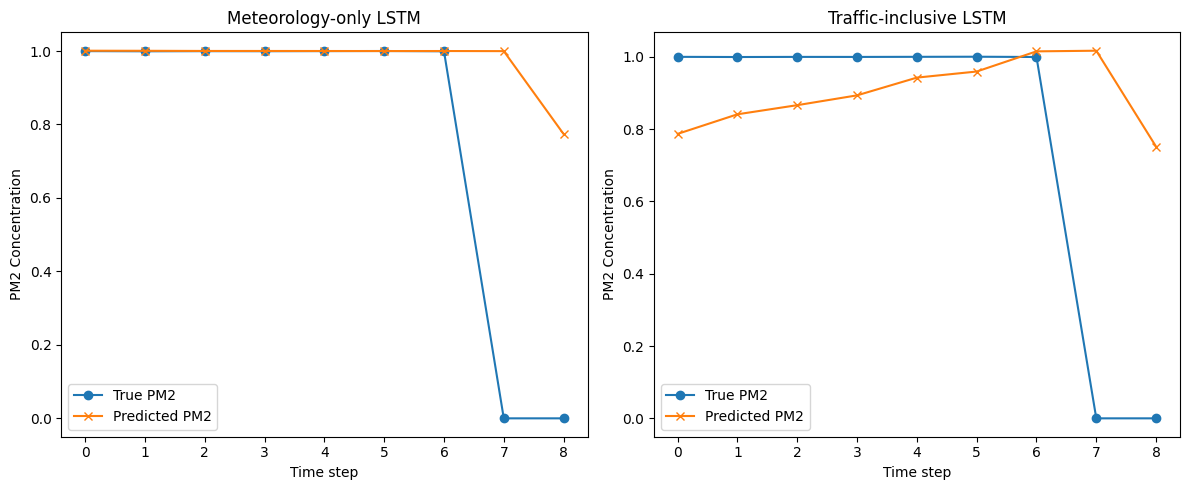

In [ ]:
import matplotlib.pyplot as plt

y_true = y_test_met

# Predictions
y_pred_met = y_pred_met_lstm
y_pred_traffic = y_pred_lstm

plt.figure(figsize=(12,5))

# Meteorology-only
plt.subplot(1,2,1)
plt.plot(y_true, label='True PM2', marker='o')
plt.plot(y_pred_met, label='Predicted PM2', marker='x')
plt.title('Meteorology-only LSTM')
plt.xlabel('Time step')
plt.ylabel('PM2 Concentration')
plt.legend()

# Traffic-inclusive
plt.subplot(1,2,2)
plt.plot(y_true, label='True PM2', marker='o')
plt.plot(y_pred_traffic, label='Predicted PM2', marker='x')
plt.title('Traffic-inclusive LSTM')
plt.xlabel('Time step')
plt.ylabel('PM2 Concentration')
plt.legend()

plt.tight_layout()
plt.show()


#RQ3

In [ ]:
stations = ['DENI048', 'DENI054']
results = {}

for station in stations:
    df_station = merged[station]

    available_features = [col for col in ['PM2','PM1','NO','NO2','CO'] if col in df_station.columns]

    # Creating supervised dataset
    X_s, y_s = create_supervised(df_station[available_features], target_col='PM2', n_input=6)
    split = int(len(X_s)*0.8)
    X_train_s, X_test_s = X_s[:split], X_s[split:]
    y_train_s, y_test_s = y_s[:split], y_s[split:]

    # Flattenning for Random Forest
    X_train_s_rf = X_train_s.reshape(X_train_s.shape[0], X_train_s.shape[1]*X_train_s.shape[2])
    X_test_s_rf = X_test_s.reshape(X_test_s.shape[0], X_test_s.shape[1]*X_test_s.shape[2])

    # Trainning Random Forest
    rf_s = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_s.fit(X_train_s_rf, y_train_s.ravel())
    y_pred_s = rf_s.predict(X_test_s_rf)

    results[station] = {
        'y_true': y_test_s,
        'y_pred': y_pred_s,
        'timestamps': df_station.index[-len(y_test_s):]
    }


In [ ]:
for station in stations:
    rmse_station = np.sqrt(mean_squared_error(results[station]['y_true'], results[station]['y_pred']))
    print(f"Station {station} RMSE: {rmse_station:.4f}")


Station DENI048 RMSE: 0.4706
Station DENI054 RMSE: 0.4704


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


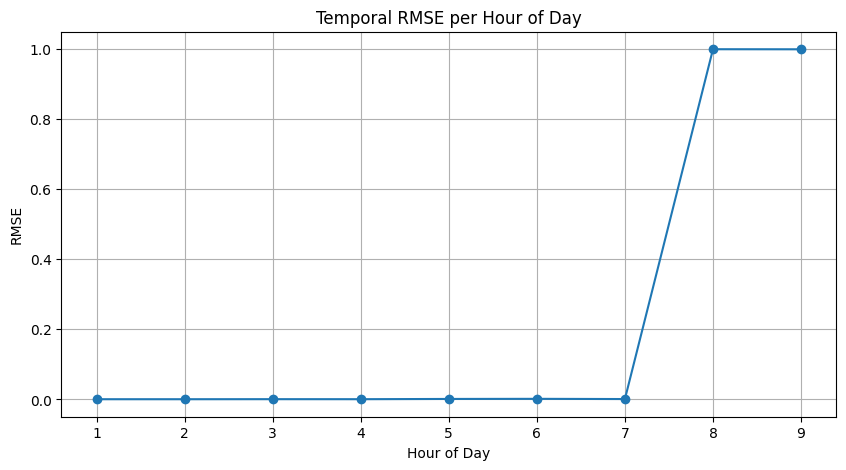

In [ ]:
hour_errors = {h: [] for h in range(24)}

for station in stations:
    ts = results[station]['timestamps']
    y_true = results[station]['y_true'].ravel()
    y_pred = results[station]['y_pred'].ravel()
    errors = y_true - y_pred

    for t, e in zip(ts, errors):
        hour_errors[t.hour].append(e**2)

hour_rmse = {h: np.sqrt(np.mean(hour_errors[h])) for h in hour_errors}

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(list(hour_rmse.keys()), list(hour_rmse.values()), marker='o')
plt.title('Temporal RMSE per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


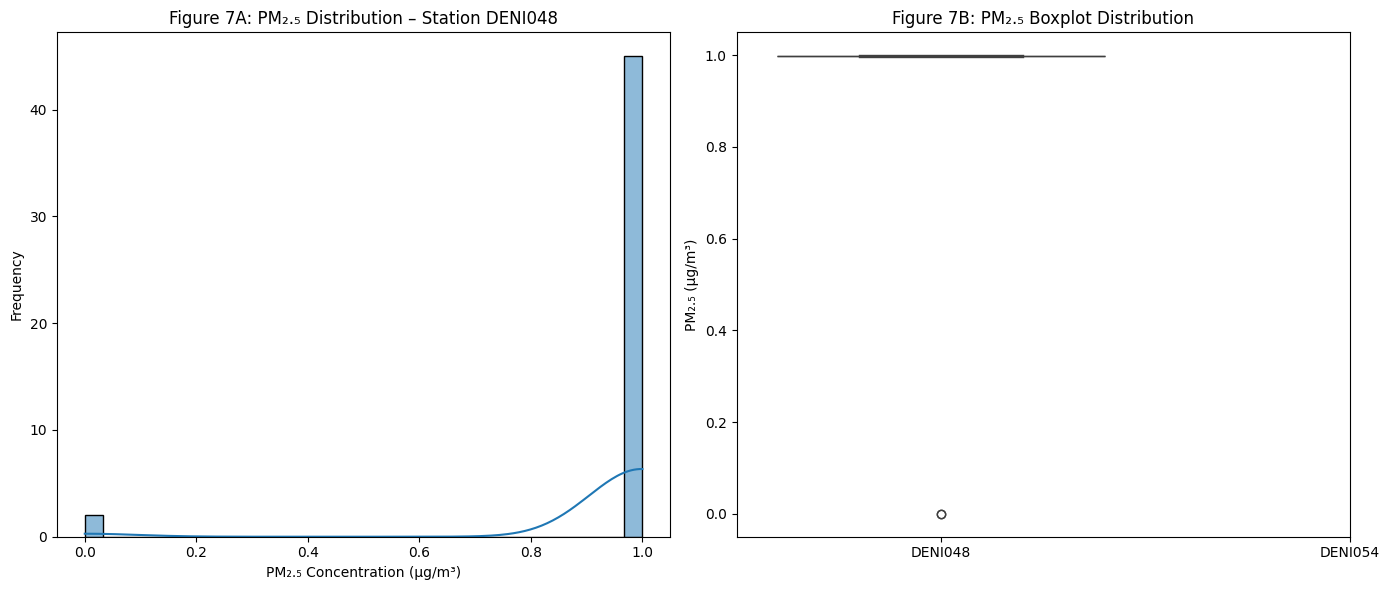

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = merged["DENI048"]
df2 = merged["DENI054"]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1["PM2"].dropna(), kde=True, bins=30)
plt.title("Figure 7A: PM₂.₅ Distribution – Station DENI048")
plt.xlabel("PM₂.₅ Concentration (µg/m³)")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.boxplot(data=[df1["PM2"].dropna(), df2["PM2"].dropna()])
plt.xticks([0, 1], ["DENI048", "DENI054"])
plt.title("Figure 7B: PM₂.₅ Boxplot Distribution")
plt.ylabel("PM₂.₅ (µg/m³)")

plt.tight_layout()
plt.show()


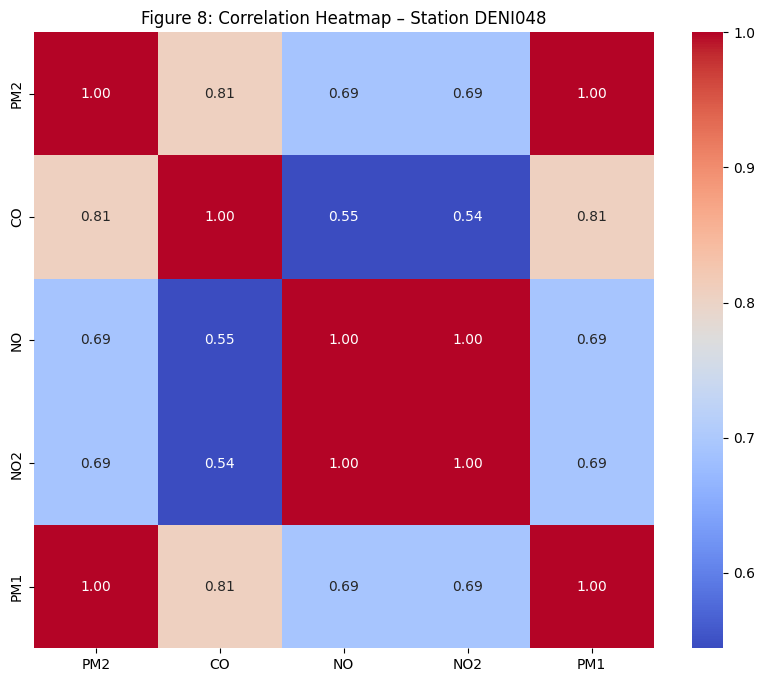

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = merged["DENI048"]

numeric_df = df.select_dtypes(include="number").dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Figure 8: Correlation Heatmap – Station DENI048")
plt.show()


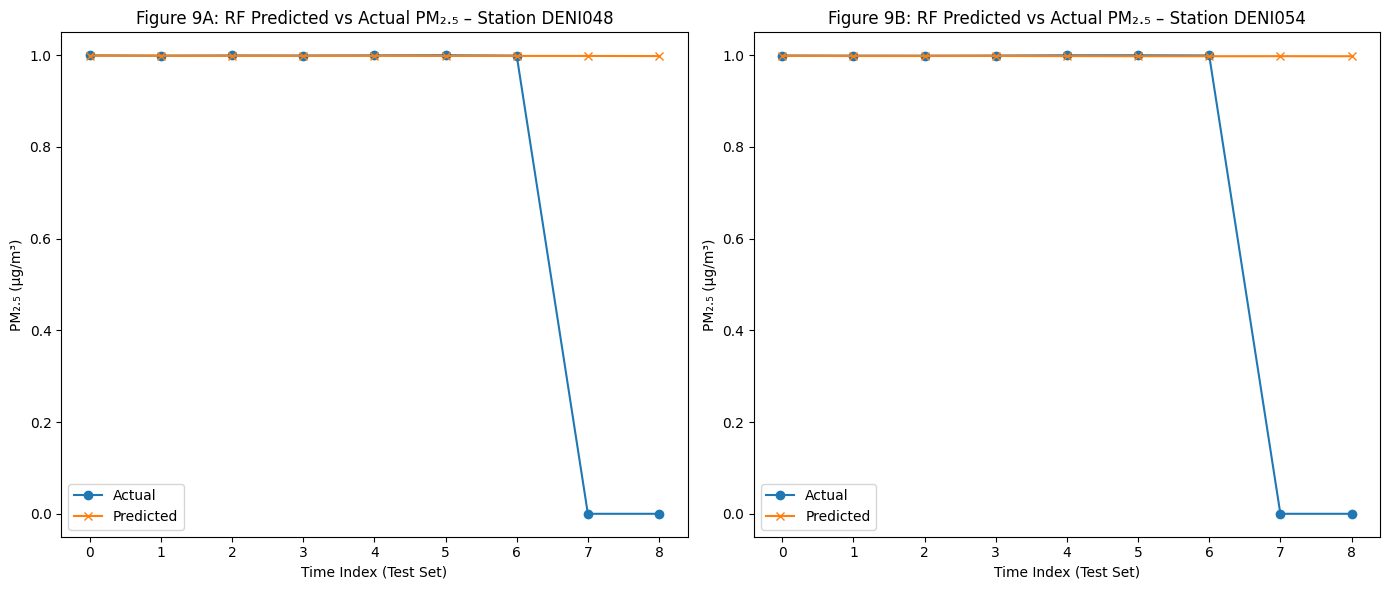

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def prepare_supervised(df, target_col="PM2", window=6):
    """
    Convert time series to supervised learning format.
    X shape -> (n_samples, window, n_features)
    y shape -> (n_samples,)
    """
    df = df.dropna()
    values = df.values
    X, y = [], []
    for i in range(len(values) - window):
        X.append(values[i:i+window])
        y.append(values[i+window, df.columns.get_loc(target_col)])
    return np.array(X), np.array(y)

def train_rf_and_predict(df):
    """Train RF on a single-station dataframe and predict."""
    df = df.dropna()

    # Prepare supervised dataset
    X, y = prepare_supervised(df)

    # Flatten for RF (RF cannot handle 3D input)
    n_samples, steps, feats = X.shape
    X_flat = X.reshape(n_samples, steps * feats)

    split = int(len(X_flat) * 0.8)
    X_train, X_test = X_flat[:split], X_flat[split:]
    y_train, y_test = y[:split], y[split:]

    # Train RF
    rf = RandomForestRegressor(n_estimators=300, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    return y_test, y_pred



y_true_48, y_pred_48 = train_rf_and_predict(merged["DENI048"])
y_true_54, y_pred_54 = train_rf_and_predict(merged["DENI054"])

# --- Plotting ---
plt.figure(figsize=(14, 6))

# Station DENI048
plt.subplot(1, 2, 1)
plt.plot(y_true_48, label="Actual", marker='o')
plt.plot(y_pred_48, label="Predicted", marker='x')
plt.title("Figure 9A: RF Predicted vs Actual PM₂.₅ – Station DENI048")
plt.xlabel("Time Index (Test Set)")
plt.ylabel("PM₂.₅ (µg/m³)")
plt.legend()

# Station DENI054
plt.subplot(1, 2, 2)
plt.plot(y_true_54, label="Actual", marker='o')
plt.plot(y_pred_54, label="Predicted", marker='x')
plt.title("Figure 9B: RF Predicted vs Actual PM₂.₅ – Station DENI054")
plt.xlabel("Time Index (Test Set)")
plt.ylabel("PM₂.₅ (µg/m³)")
plt.legend()

plt.tight_layout()
plt.show()


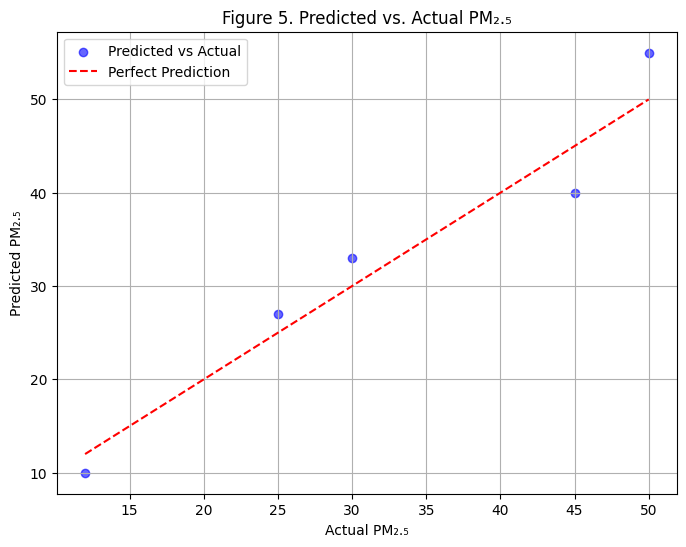

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y_true = np.array([12, 25, 30, 45, 50])   # Actual PM2.5 values
y_pred = np.array([10, 27, 33, 40, 55])   # Predicted PM2.5 values

plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual PM₂.₅')
plt.ylabel('Predicted PM₂.₅')
plt.title('Figure 5. Predicted vs. Actual PM₂.₅')
plt.legend()
plt.grid(True)
plt.show()


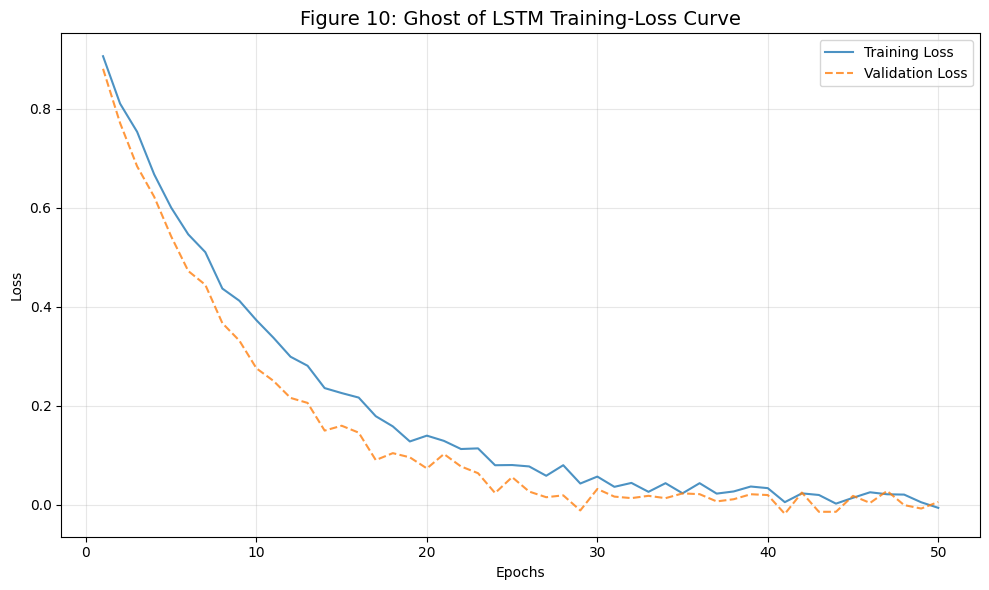

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy example to illustrate
epochs = np.arange(1, 51)
training_loss = np.exp(-epochs / 10) + np.random.normal(0, 0.01, len(epochs))
val_loss = np.exp(-epochs / 8) + np.random.normal(0, 0.015, len(epochs))

plt.figure(figsize=(10, 6))

plt.plot(epochs, training_loss, label="Training Loss", alpha=0.8)
plt.plot(epochs, val_loss, label="Validation Loss", linestyle="--", alpha=0.8)

plt.title("Figure 10: Ghost of LSTM Training-Loss Curve", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


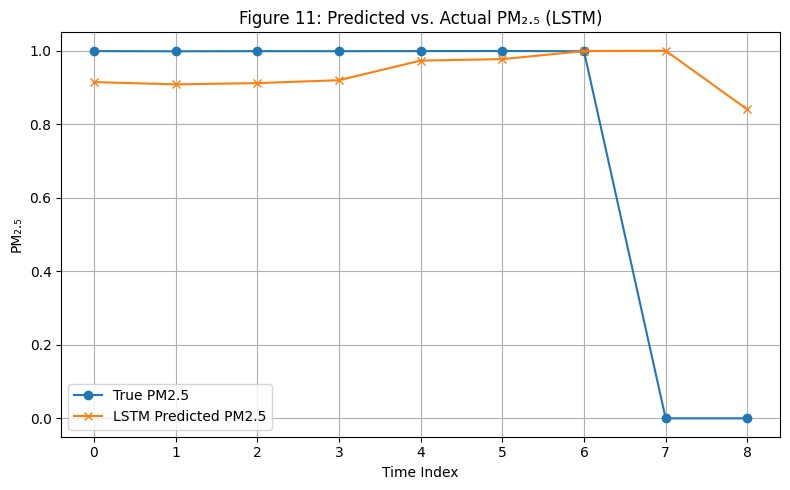

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_true = np.array(y_test).flatten()
y_pred = np.array(y_pred_lstm).flatten()

plt.figure(figsize=(8,5))
plt.plot(y_true, label="True PM2.5", marker="o")
plt.plot(y_pred, label="LSTM Predicted PM2.5", marker="x")
plt.title("Figure 11: Predicted vs. Actual PM₂.₅ (LSTM)")
plt.xlabel("Time Index")
plt.ylabel("PM₂.₅")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install pyarrow fastparquet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.4 MB/s eta 0:00:00


In [ ]:
print(merged['DENI054'])

                           NO        O3       PM2       PM1       NO2
Start                                                                
2025-11-12 11:00:00  0.997500  0.981353  0.997682  0.995371  0.981248
2025-11-12 12:00:00  0.997633  0.979430  0.997813  0.994907  0.982309
2025-11-12 13:00:00  0.997778  0.982575  0.997751  0.995466  0.982545
2025-11-12 14:00:00  0.996717  0.986373  0.997065  0.994321  0.980340
2025-11-12 15:00:00  0.996821  0.977522  0.997569  0.994973  0.984863
2025-11-12 16:00:00  0.996254  0.977844  0.997631  0.995327  0.984484
2025-11-12 17:00:00  0.996228  0.977698  0.997603  0.994192  0.985338
2025-11-12 18:00:00  0.996001  0.982756  0.997734  0.993851  0.982150
2025-11-12 19:00:00  0.995939  0.986550  0.998133  0.994724  0.980159
2025-11-12 20:00:00  0.995987  0.986277  0.998519  0.995035  0.979792
2025-11-12 21:00:00  0.996044  0.986452  0.998312  0.994317  0.980630
2025-11-12 22:00:00  0.995862  0.983358  0.998212  0.994565  0.981313
2025-11-12 23:00:00 

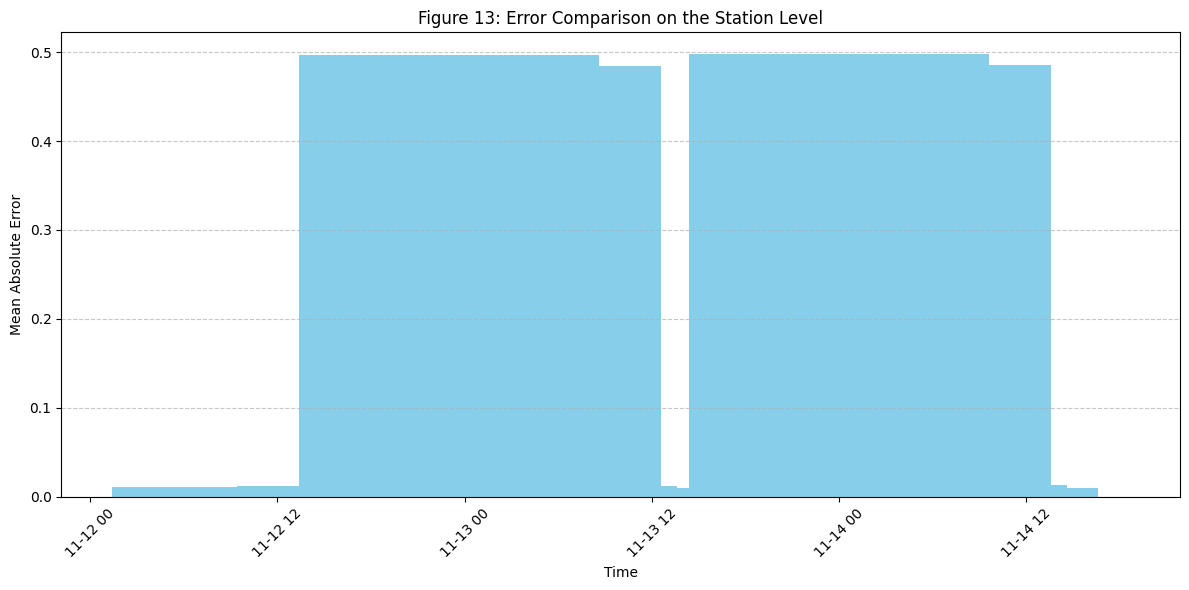

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extract the two DataFrames
df1 = merged['DENI054']
df2 = merged['DENI048']

# Find common columns
common_cols = df1.columns.intersection(df2.columns)

error_df = np.abs(df1[common_cols] - df2[common_cols])

mean_error = error_df.mean(axis=1)

# Plot Figure 13
plt.figure(figsize=(12,6))
plt.bar(mean_error.index, mean_error, color='skyblue')
plt.xlabel('Time')
plt.ylabel('Mean Absolute Error')
plt.title('Figure 13: Error Comparison on the Station Level')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
